In [1]:

import numpy as np
import matplotlib.pyplot as plt

import math
import pandas as pd

In [3]:
# Создаем массив lambda_arr, который содержит значения λ от 0.10 до 0.5 с шагом 0.05.
lambda_array = np.arange(0.10,0.5,0.05)

Pk - Реализует вычисления вероятностей для распределения Пуассона, описывающего количество новых сообщений, поступающих в систему. Для более оптимальной работы было использовано приближение Стирлинга для логарифма факториала

In [6]:
def Pk(lam, j):
    log_prod = (j * math.log(lam) - lam - math.log(math.factorial(j)))
    return math.exp(log_prod)

Rk - Вычисляет вероятность "успеха",  один активный абонент передал сообщение 

In [9]:
def Rk(i):
    return (math.factorial(i) / (math.factorial(i - 1) * math.factorial(1))) * (1 / i) * ((1 - 1 / i) ** (i - 1))

Была прописана функция для расчета вероятности перехода из состояния i в состояние i-1. Событие перехода из состояния i в состояние i-1 означает, что новых АБ не появилось, и один АБ передал сообщение 

In [12]:
def p_prevState(lam, i):
    return Rk(i) * Pk(lam, 0)

Была прописана функция для расчета вероятности перехода из состояния 0 в состояние  j. Переход из состояния 0 в состояние j может произойти, только когда количество АБ, у которых появилось сообщение будет равно j 

In [15]:
def p_zeroJump(lam, j):
    return Pk(lam, j)

Была прописана функция для расчета вероятности перехода из состояния i в состояние j. Переход из состояния i в j может произойти в случае, если один АБ передал сообщение и появились (j-i+1) АБ-ов, или если ни один не передал сообщение и появились (j-i) АБ-ов 

In [18]:
def From_i_in_j(lam, i, j):
    return Rk(i) * Pk(lam, j - i + 1) + (1 - Rk(i)) * Pk(lam, j - i)


Была прописана функция для расчета вероятности перехода из состояния i в состояние i. Событие перехода из состояния i в состояние i-1 означает, что новых АБ не появилось, и один АБ передал сообщение 

In [21]:
def Stay_in_i(lam, i):
    return (1 - Rk(i)) * Pk(lam, 0) + Rk(i) * Pk(lam, 1)


Была прописана для построения матрицы и решения системы. Матрица 𝑃 представляет вероятности переходов между состояниями. Это квадратная матрица размером (𝑁+1)×(𝑁+1), где 𝑁 — максимальное состояние (количество абонентов). На 𝑖-й строке и 𝑗-м столбце находится вероятность перехода из состояния 𝑖 в состояние 𝑗. Для получения стационарного распределения 𝜋, решается система уравнений: 𝑃𝑇⋅𝜋=𝜋 и ∑(𝑖=0)𝑁𝜋𝑖=1. PT−I: Преобразование матрицы переходов для уравнения 𝑃𝑇⋅𝜋−𝜋=0
np.eye(N+1): Единичная матрица, которая обеспечивает корректное вычитание 𝜋 из каждой строки 


In [24]:
def Modeling(lam, N):
    P = np.zeros((N + 1, N + 1))
    for i in range(N + 1):
        for j in range(N + 1):
            if i == 0:
                P[i, j] += p_zeroJump(lam, j)
            elif i == j:
                P[i, j] += Stay_in_i(lam, i)
            elif i < j:
                P[i, j] += From_i_in_j(lam, i, j)
            elif i == j + 1:
                P[i, j] += p_prevState(lam, i)
            else:
                P[i, j] += 0
    #• Здесь создается матрица A, которая состоит из двух частей:
#• Транспонированная матрица P (то есть строки и столбцы меняются местами) с вычитанием единичной матрицы (np.eye(N + 1)). Это позволяет создать уравнения для вероятностей.

 # • Вторая часть — это строка с единицами (np.ones(N + 1)), которая используется для нормировки.


    A = np.vstack([P.T - np.eye(N + 1), np.ones(N + 1)])
    # Здесь создается вектор B, который будет содержать значения для системы уравнений. Все элементы инициализируются нулями, за исключением последнего элемента, который равен 1. 
    #Это соответствует условию нормировки: сумма всех вероятностей равна 1.

    B = np.zeros(N + 2)
    B[-1] = 1
    #• Система уравнений решается методом наименьших квадратов с использованием функции np.linalg.lstsq(). 
    # Этот метод позволяет найти вектор вероятностей pi, который удовлетворяет условиям системы уравнений.

    # Система решается методом наименьших квадратов
    pi = np.linalg.lstsq(A, B, rcond=None)[0]
   # • Функция возвращает вектор pi, который содержит вероятности нахождения системы в различных состояниях.

    return pi


Была прописана функция для вычисления среднее количество абонентов, находящихся в системе, по формуле ∑𝑖⋅𝜋(𝑖) 

In [27]:
def avuser(mas_pi):
    return np.sum(np.arange(len(mas_pi)) * mas_pi)


Были посчитаны зависимости среднего количества АБ-ов, находящихся в системе от интенсивности входного потока   Были посчитаны зависимости среднего количества АБ-ов, находящихся в системе от интенсивности входного потока   

In [30]:
ml10 = []
ml50 = []
ml100 = []
ml1000 = []


Были посчитаны зависимости среднего количества АБ-ов, находящихся в системе от интенсивности входного потока   (листинг 9).

In [32]:
for lam in lambda_array:
    ml10.append({'lamda': lam, 'N': avuser(Modeling(lam, 10))})
    ml50.append({'lamda': lam, 'N': avuser(Modeling(lam, 50))})
    ml100.append({'lamda': lam, 'N': avuser(Modeling(lam, 100))})
    ml1000.append({'lamda': lam, 'N': avuser(Modeling(lam, 1000))})

In [33]:
ml10 = pd.DataFrame(ml10)
ml50 = pd.DataFrame(ml50)
ml100 = pd.DataFrame(ml100)
ml1000 = pd.DataFrame(ml1000)

In [35]:
ml = [1.20468000e-01,2.08371000e-01,3.37802000e-01,5.75329000e-01, 1.09351200e+00 ,4.39146600e+00 ,1.52583347e+04 ,4.18770401e+04]

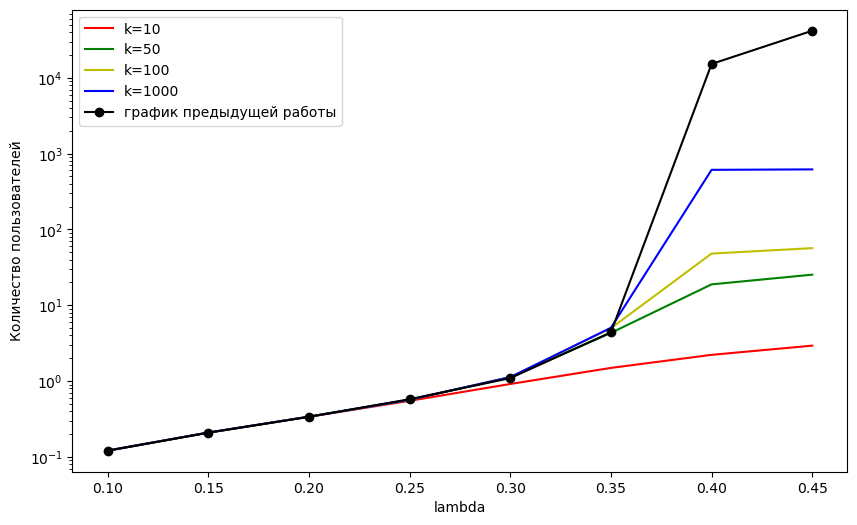

In [50]:
plt.figure(figsize=(10, 6))
plt.plot(ml10['lamda'], ml10['N'], color='r', label='k=10')
plt.plot(ml50['lamda'], ml50['N'], color='g', label='k=50')
plt.plot(ml100['lamda'], ml100['N'], color='y', label='k=100')
plt.plot(ml1000['lamda'], ml1000['N'], color='b', label='k=1000')
plt.plot(lambda_array, ml, marker='o', color='black', label = 'график предыдущей работы')
plt.yscale('log')
plt.ylabel('Количество пользователей')
plt.xlabel('lambda')
plt.legend()
plt.xticks(lambda_array)
plt.show()
